## Import Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [122]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering and Data Preprocessing

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [124]:
data.drop(labels = ["id"], axis = 'columns', inplace = True)

In [125]:
data['date'] = data['date'].apply(pd.Timestamp)
data['yr_built'] = data['yr_built'].apply(str).apply(pd.Timestamp)

In [126]:
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = data.loc[data['yr_renovated'] == 0, 'yr_built']    # Replace the 0s in year of renovation with year of creation of that house

In [127]:
data['yr_renovated'] = data['yr_renovated'].apply(str).apply(pd.Timestamp)
age_renovated = data['date'] - data['yr_renovated']

def get_renovate_year(val):        # Get the years passed after renovation
    return val.days/365

age_renovated.apply(get_renovate_year)
data.insert(4, "age_renovated", age_renovated.apply(get_renovate_year))

In [128]:
age_house = data['date'] - data['yr_built']
def get_age_years(val):
    return val.days / 365            # Get the age of the house

data.insert(3, "age_of_house", age_house.apply(get_age_years))

In [129]:
data.head()

,date,price,bedrooms,age_of_house,bathrooms,age_renovated,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,59.821918,1.00,59.821918,1180,5650,1.0,0,...,7,1180,0,1955-01-01,1955-01-01,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,63.980822,2.25,23.953425,2570,7242,2.0,0,...,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,82.205479,1.00,82.205479,770,10000,1.0,0,...,6,770,0,1933-01-01,1933-01-01,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,49.969863,3.00,49.969863,1960,5000,1.0,0,...,7,1050,910,1965-01-01,1965-01-01,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,28.150685,2.00,28.150685,1680,8080,1.0,0,...,8,1680,0,1987-01-01,1987-01-01,98074,47.6168,-122.045,1800,7503


In [131]:
data = data.drop(labels = ['date', 'yr_built', 'zipcode', 'long', 'yr_renovated'], axis = 'columns')

In [132]:
data.tail()

,price,bedrooms,age_of_house,bathrooms,age_renovated,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
21608,360000.0,3,5.386301,2.50,5.386301,1530,1131,3.0,0,0,3,8,1530,0,47.6993,1530,1509
21609,400000.0,4,1.145205,2.50,1.145205,2310,5813,2.0,0,0,3,8,2310,0,47.5107,1830,7200
21610,402101.0,2,5.476712,0.75,5.476712,1020,1350,2.0,0,0,3,7,1020,0,47.5944,1020,2007
21611,400000.0,3,11.049315,2.50,11.049315,1600,2388,2.0,0,0,3,8,1600,0,47.5345,1410,1287
21612,325000.0,2,6.791781,0.75,6.791781,1020,1076,2.0,0,0,3,7,1020,0,47.5941,1020,1357


In [133]:
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].astype('float32')
    elif data[column].dtype == 'int64':
        data[column] = data[column].astype('int16')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float32
 1   bedrooms       21613 non-null  int16  
 2   age_of_house   21613 non-null  float32
 3   bathrooms      21613 non-null  float32
 4   age_renovated  21613 non-null  float32
 5   sqft_living    21613 non-null  int16  
 6   sqft_lot       21613 non-null  int16  
 7   floors         21613 non-null  float32
 8   waterfront     21613 non-null  int16  
 9   view           21613 non-null  int16  
 10  condition      21613 non-null  int16  
 11  grade          21613 non-null  int16  
 12  sqft_above     21613 non-null  int16  
 13  sqft_basement  21613 non-null  int16  
 14  lat            21613 non-null  float32
 15  sqft_living15  21613 non-null  int16  
 16  sqft_lot15     21613 non-null  int16  
dtypes: float32(6), int16(11)
memory usage: 971.0 KB


Text(0.5, 1.0, 'Correlation Matrix')

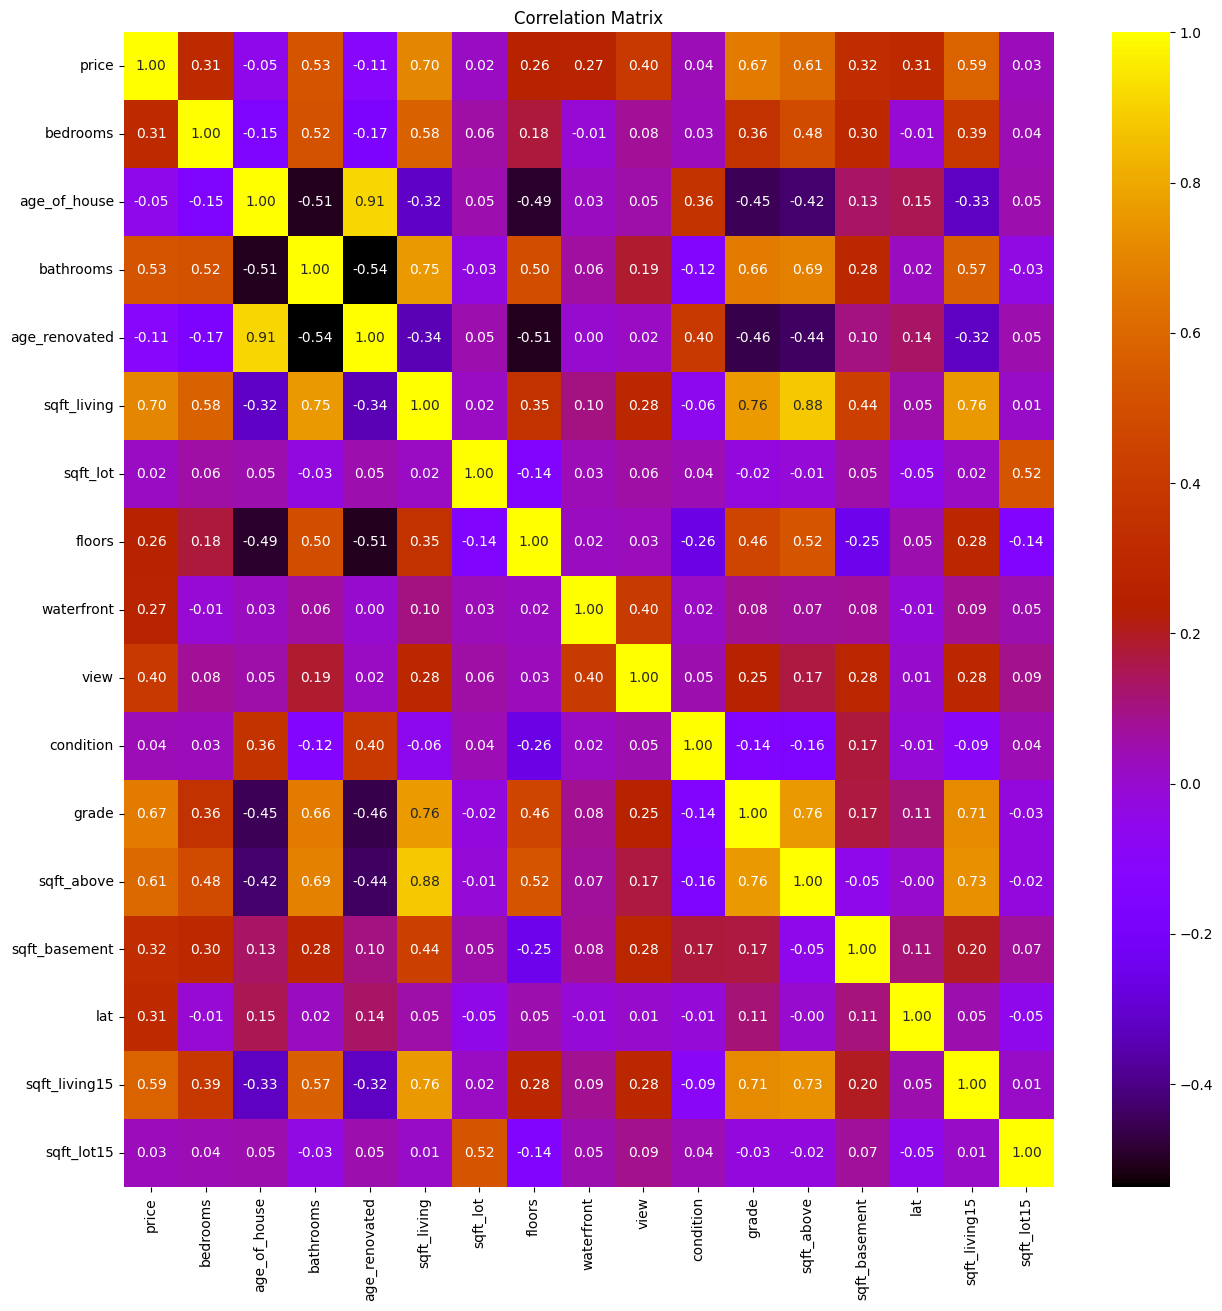

In [140]:
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'gnuplot')
plt.title("Correlation Matrix")

## EDA

In [141]:
plt.style.use("fivethirtyeight")

In [143]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


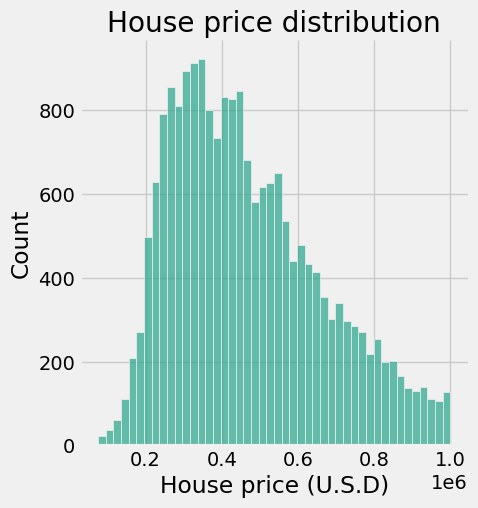

In [147]:
sns.displot(x = "price", data = data, binrange = (data['price'].min(), 1e6 ), color = "#32a891")
plt.title("House price distribution")
plt.xlabel("House price (U.S.D)")
plt.show();

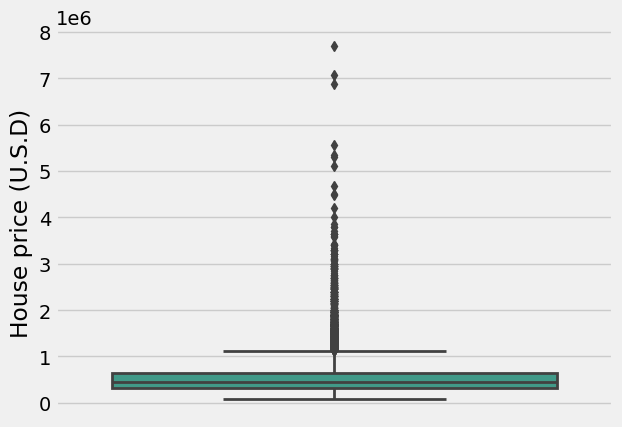

In [148]:
sns.boxplot(y = "price", data = data, color = "#32a891", linewidth = 2)
plt.ylabel("House price (U.S.D)")
plt.show()

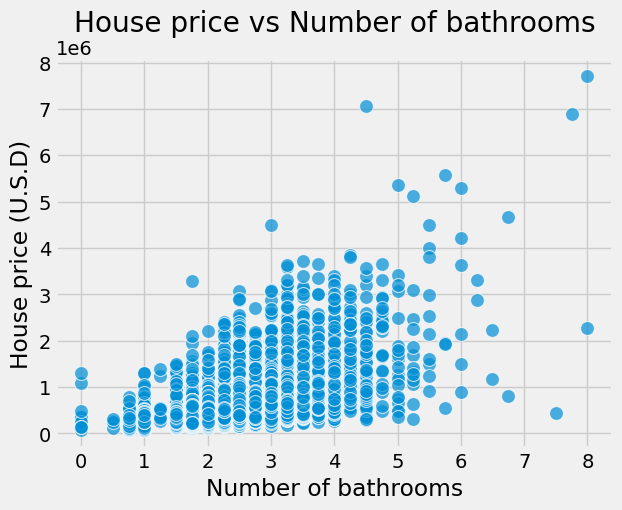

In [149]:
sns.scatterplot(x = "bathrooms", y = "price", data = data, s = 100, alpha = 0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Number of bathrooms")
plt.show()

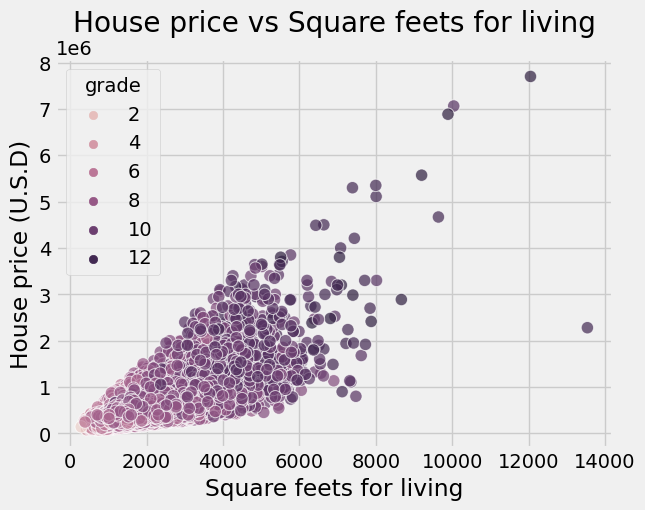

In [20]:
sns.scatterplot(x = "sqft_living", y = "price", data = data, color = "#eb5234",s = 80, alpha = 0.7, hue = 'grade')
plt.xlabel("Square feets for living")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Square feets for living")
plt.show()

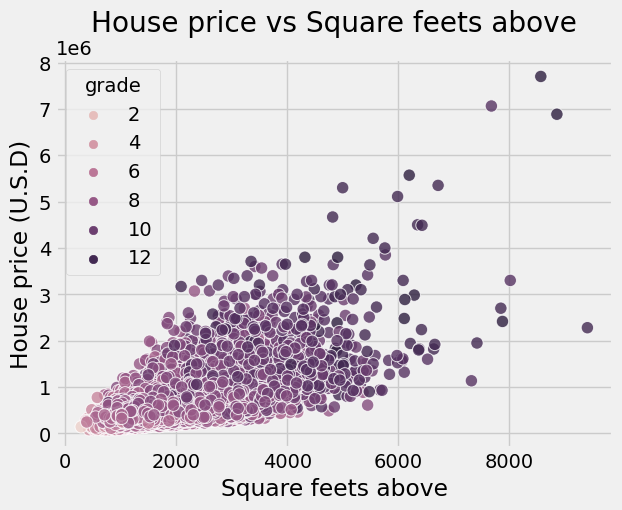

In [21]:
sns.scatterplot(x = "sqft_above", y = "price", data = data, color = "#cc34eb",s = 80, alpha = 0.8, hue = 'grade')
plt.xlabel("Square feets above")
plt.ylabel("House price (U.S.D)")
plt.title("House price vs Square feets above")
plt.show()

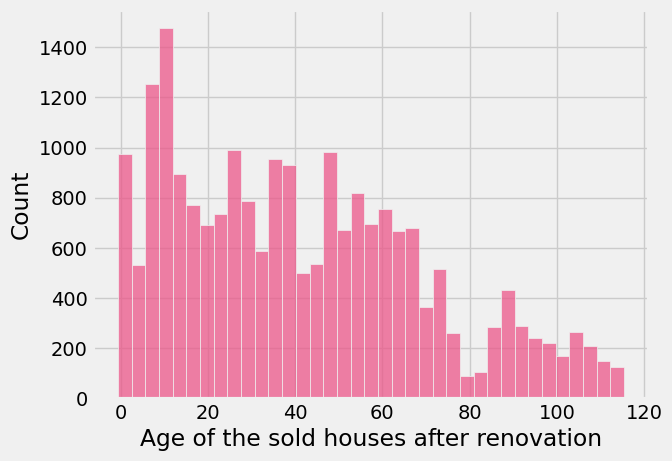

In [153]:
sns.histplot(x = "age_renovated", data = data, color = "#ec5789")
plt.xlabel("Age of the sold houses after renovation")
plt.show()

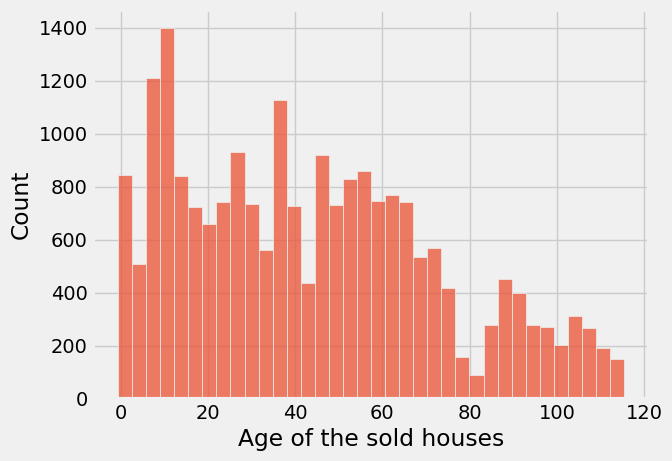

In [154]:
sns.histplot(x = "age_of_house", data = data, color = "#eb5234")
plt.xlabel("Age of the sold houses")
plt.show()

## Feature and label extraction

In [159]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

## Train and test set split

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

### `Linear Regression` model

In [165]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

### Prediction

In [166]:
Y_pred = lin_reg.predict(X_test)

### K fold cross validation

In [167]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(estimator = lin_reg, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.697
Average test score : 0.693


### r2_score

In [168]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6836337593221232

## `Decision Tree` model

In [169]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)

DecisionTreeRegressor()

### Grid search

In [170]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [40, 50, 60, 70],
    'min_samples_split' : [2, 3, 4, 5, 7, 10],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_impurity_decrease' : [0.1, 0.001, 0.01, 1]
}
grid = GridSearchCV(estimator = dtree, cv = 10, n_jobs = -1, param_grid = params, scoring = 'r2')
grid.fit(X_train, Y_train)

print(f"Best score : {grid.best_score_}")
print(f"Best score : {grid.best_params_}")

Best score : 0.7307459516650925
Best score : {'max_depth': 50, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 7, 'min_samples_split': 10}


In [171]:
dtree = DecisionTreeRegressor(max_depth = 50, min_impurity_decrease = 0.001, min_samples_leaf = 7, min_samples_split = 10)
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=50, min_impurity_decrease=0.001,
                      min_samples_leaf=7, min_samples_split=10)

### K fold cross validation

In [172]:
cross_val = cross_validate(estimator = dtree, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.895
Average test score : 0.730


### Prediction

In [173]:
Y_pred = dtree.predict(X_test)

### R2 Score

In [174]:
r2_score(Y_test, Y_pred)

0.7792515097326711

## `Random forest` model

In [175]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators = 150, n_jobs = -1)
rforest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1)

### K fold cross validation

In [176]:
cross_val = cross_validate(estimator = rforest, X = X_train, y = Y_train, cv = 10, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.976
Average test score : 0.824


### Prediction and R2 score

In [177]:
Y_pred = rforest.predict(X_test)
print(r2_score(Y_test, Y_pred))

0.8495903470090198


## 

## `XGBoost` model

In [178]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs = -1, n_estimators = 200, subsample = 0.9)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### K fold cross validation

In [179]:
cross_val = cross_validate(estimator = xgb, X = X_train, y = Y_train, cv = 5, scoring = 'r2', n_jobs = -1, return_train_score = True)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.985
Average test score : 0.817


### Prediction and R2 score

In [180]:
Y_pred = xgb.predict(X_test)
r2_score(Y_test, Y_pred)

0.863997949725781

## `CatBoost` model

In [181]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()

In [182]:
cbr.fit(X_train, Y_train, verbose = 0)

### K fold cross validation

In [49]:
cross_val = cross_validate(estimator = cbr, X = X_train, y = Y_train, cv = 5, scoring = 'r2', return_train_score = True, n_jobs=-1)

print(f"Average train score : {cross_val['train_score'].mean() :.3f}")
print(f"Average test score : {cross_val['test_score'].mean() :.3f}")

Average train score : 0.945
Average test score : 0.842


### Prediction

In [183]:
Y_pred = cbr.predict(X_test)

### R2 score

In [184]:
r2_score(Y_test, Y_pred)

0.8698033515839303

## `CatBoost` performing best 

### `R2 score` : `0.87` (rounded upto 2 decimal places)